# **`Regression`**

- It is a **Supervised** Machine Learning technique/alogrithm that is used to predict a **Continuous Value** (target or y) based on features (input variables or X)

- It establishes a relationship between **Independent variable(s)** (X or features) and **Dependent variable** (y or target)

- Regression = predicting a number, not a class.

- Examples:
   - House price 🏠 → ₹ value
   - Marks → score

- Different Types Of Regression:
    - Linear:
        - Linear Regression
        - Lasso Regression
        - Ridge Regression 
    - Linear & Non-Linear:
        - Polynomial Regression
        - Support Vector Regressor 
        - Decision Tree Regressor 
        - More advanced regression models

- For Linear Regression(or any other regression) in general we can have 2 categories:
    - Simple Linear Regression :
        - One Independent Variable (X) and a dependent variable (y) 
        - Example: 
            - X → hours studied
            - y → marks
        - Equation : $y = B_0 + B_1X$ similar to the equation of a line $y = mx + c$ (m: slope, c: y-intercept)
    - Multiple Linear Regression : 
        - Multiple Independent variables (X1, X2, X3, ..., Xn) and a dependent variable (y)  (MORE THAN ONE input feature)
        - Example:
            - X₁ → hours studied
            - X₂ → sleep
            - X₃ → revision count
            - y → marks
        - Equation: $y = B_0 + B_1X_1 + B_2X_2 + B_3X_3 + ... + B_nX_n $ (we have multiple slope values, X represents Different features)

![linreg](https://miro.medium.com/v2/resize:fit:800/0*_RYGlkVN4U-zzMXH.png)

## **`Linear Regression`**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go

#for data 
from sklearn.datasets import fetch_california_housing

> sklearn offers some datasets 

In [2]:
cal_housing = fetch_california_housing()
print(cal_housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [3]:
df = pd.DataFrame(cal_housing['data'], columns=cal_housing['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


now to add 'target' key column to this 'data' key table

In [4]:
df['MedHouseVal'] = cal_housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


to know more about this sklearn dataset use --> '**`DESCR`**'

In [5]:
print(cal_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### **`EDA`**

Exploring given data 

1. Check for nulls using isna().sum()

In [6]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Check for memory usage, number of rows/columns, data types of entries 

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Check for counts, mean, etc

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


- Observations :
    - **HouseAge** median is 29 and mean is 28.63:
        - The data is normally distributed because the mean is very close to median
        - Half of the house are older than 29 years 
    - **AveRooms** include Kitchen, Living room, etc and some of the units can be studios
    - **MedInc** average income around $38,700 (1990 old salary levels)
    - **Population** have a very wide range and dispersion. Can be observed from min(only 3 people), max(35k people), std
    - **AveOccup** its minimum is 0.69 which tells us that some proerties are vacant in some of the blocks 

Lets visualize using Box Plot

<Axes: ylabel='AveOccup'>

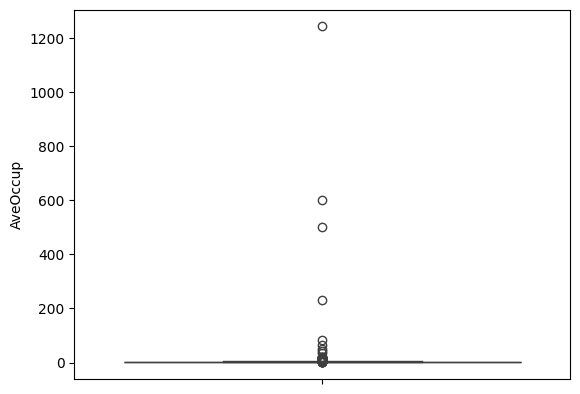

In [9]:
sns.boxplot(df['AveOccup'])

We can also use Hist plot and have custom bins

<Axes: xlabel='AveOccup', ylabel='Count'>

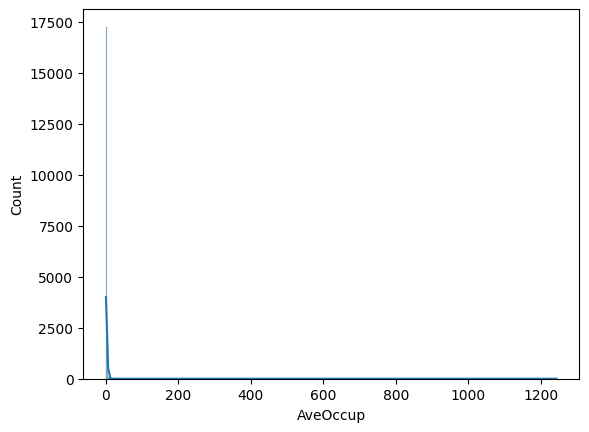

In [10]:
sns.histplot(df['AveOccup'], bins=[0,2,4,6,10,20], kde=True)

This hist plot is so wild so we try to remove Outliers -- using Percentile or Z-Score Method

### Outlier Removal 

**`df['Column].quantile(limit)`**
- Defines Upper Limit and Lower Limit 

In [11]:
AvgOccup_UL = df['AveOccup'].quantile(0.95)     #upper limit
AvgOccup_LL = df['AveOccup'].quantile(0.05)     #lower limit

print('Upper Limit:', AvgOccup_UL)
print('Lower Limit:', AvgOccup_LL)


Upper Limit: 4.333416666666666
Lower Limit: 1.872544757033248


In [12]:
df_org = df.copy()

In [13]:
mask = (df['AveOccup'] < AvgOccup_UL) & (df['AveOccup'] > AvgOccup_LL)

df = df[mask]

<Axes: ylabel='AveOccup'>

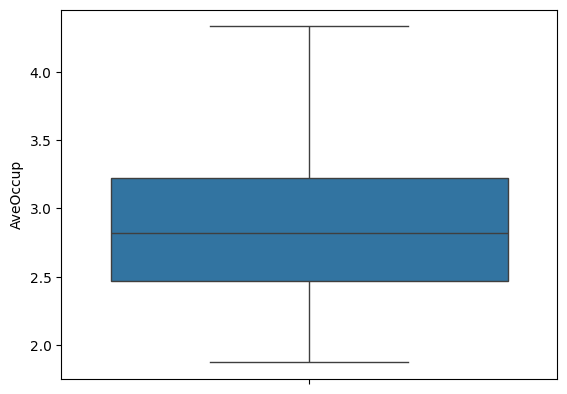

In [14]:
sns.boxplot(df['AveOccup'])

Now its better, but still it is recommended to check on loss of data

In [15]:
print('Shape Before: ', df_org.shape)
print('Shape After: ', df.shape)
print('Removed: ', df_org.shape[0] - df.shape[0])

Shape Before:  (20640, 9)
Shape After:  (18576, 9)
Removed:  2064


### Visualize **Longitude** and **Latitude** using **`Maps`**

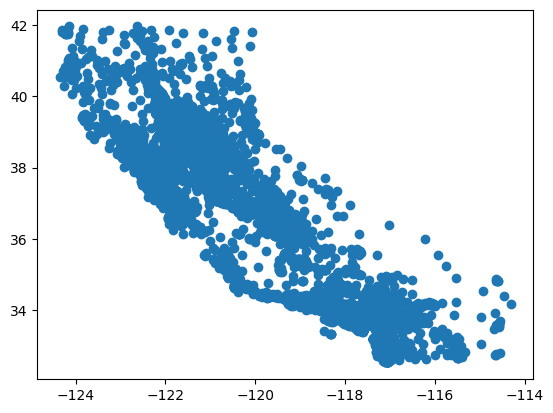

In [16]:
plt.scatter(x=df['Longitude'], y=df['Latitude'])

Text(0, 0.5, 'Latitude')

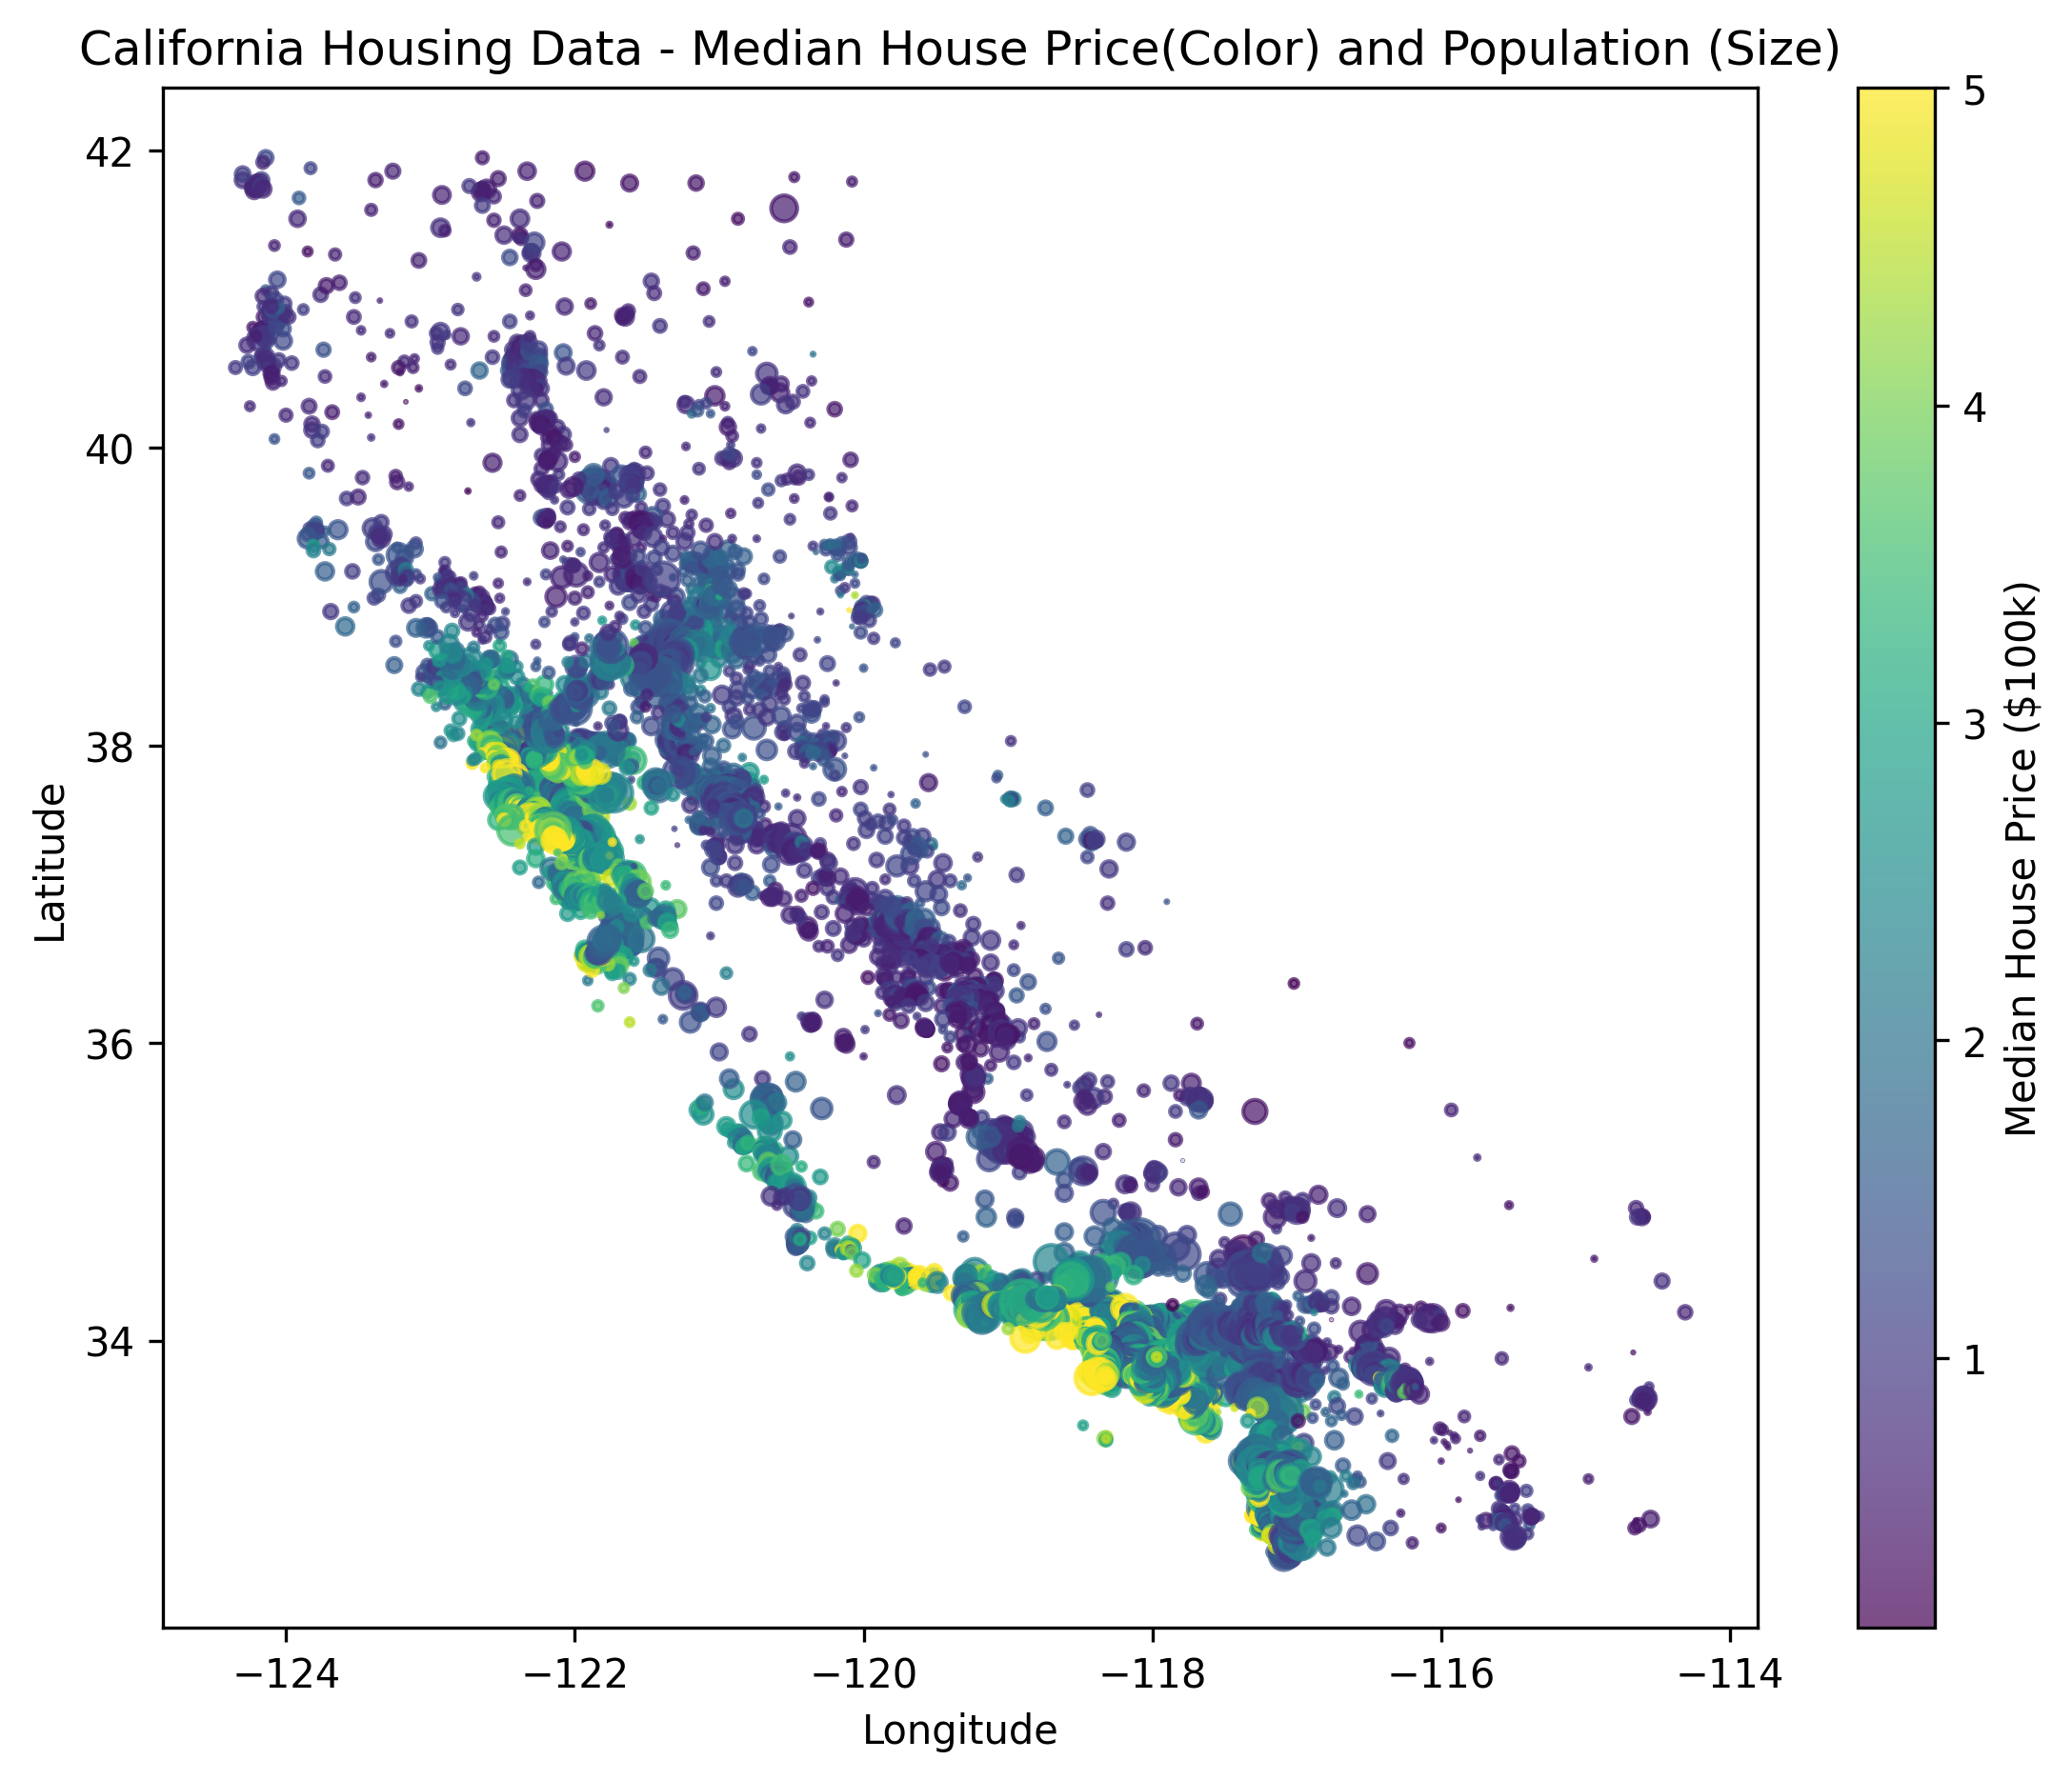

In [17]:
plt.figure(figsize=(9,7), dpi=300)

plt.scatter(x=df['Longitude'], y=df['Latitude'], alpha=0.7, c=df['MedHouseVal'], s=df['Population']/100)
#                                                             'c' is Color        's' is Size of Bubble

plt.colorbar(label='Median House Price ($100k)')                # this is new for us 

plt.title("California Housing Data - Median House Price(Color) and Population (Size)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Using Plotly

In [18]:
fig = go.Figure(go.Scattermapbox(lat=df['Latitude'], lon=df['Longitude'],
                                  hoverinfo='text',
                                  hovertext=df.apply(lambda row: f"Median House Price($100k): ${row['MedHouseVal']}, Population: {row['Population']}", axis=1),
                                  mode='markers',
                                  marker=go.scattermapbox.Marker(color=df['MedHouseVal'], colorbar=dict(title='Median House Price'), size=df['Population']/400)
                                ))

fig.update_layout(mapbox_style='carto-positron',
                  #california state limits
                  mapbox_center_lat= 37.7749,
                  mapbox_center_lon=-122.4194,
                  mapbox_zoom = 6,
                  margin={'r':0, 't':0, 'l':0, 'b':0})

#view map
fig.show()

/tmp/ipykernel_19798/41818359.py:1: DeprecationWarning: *scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = go.Figure(go.Scattermapbox(lat=df['Latitude'], lon=df['Longitude'],


This code creates an interactive Mapbox map using Plotly to visualize geographical data. Each marker represents a location defined by latitude and longitude, and the color of the marker corresponds to the median house value. The map is centered on California with an appropriate zoom level for state-wide visualization.

### Evaluating the Model Linearity
- Technically, you can jump straight into building the linear regression model using **sklearn** however it is recommended to inspect the linearity of model/data if it is complex and has a big number of features 
- We will be using `statsmodels.api` to build a linear regression model tha explains how good of a fit a model is and provide coefficients (B1, B2, B3, etc...)

- Steps:
    1. Define X and y
    2. Add an arbitrary constant $B_0$ (will be adjusted later after fitting the model)
    3. Deploy the Linear Regression Model (OLS - Ordinary Search Squares)
    4. Get the OLS Summary
    5. Check for Multicollinearity - modify the data if it exists 
    6. Repeat steps 3 and 4 to get a better model summary

Step 1 : Split data and Define X(train data) and y(test data)

In [19]:
#train data
X = df.drop(columns='MedHouseVal', axis=1)      #features

#test data
y = df['MedHouseVal']                           #targets

In [20]:
import statsmodels.api as sm

Step 2 : Add an Arbitrary Constant $B_0$

In [21]:
X_constant = sm.add_constant(X)
X_constant.head()

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1.0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1.0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Step 3 : Deploy the OLS Model

In [22]:
ols_model = sm.OLS(y, X_constant).fit()

> we need to use X_constant i.e., data with arbitrary constant added for our OLS model

Step 4 : Get OLS Model Summary

In [23]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     5063.
Date:                Fri, 06 Feb 2026   Prob (F-statistic):               0.00
Time:                        23:57:00   Log-Likelihood:                -18020.
No. Observations:               18576   AIC:                         3.606e+04
Df Residuals:                   18567   BIC:                         3.613e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.6608      0.605    -55.662      0.000     -34.846     -32.475
MedInc         0.3962      0.004     99.241      0.000       0.388       0.404
HouseAge       0.0095      0.000     22.640      0.000       0.009       0.010
AveRooms      -0.0337      0.006     -5.840      0.000      -0.045      -0.022
AveBedrms      0.2855      0.028     10.202      0.000       0.231       0.340
Population  3.847e-05   4.72e-06      8.142      0.000    2.92e-05    4.77e-05
AveOccup      -0.4565      0.009    -51.131      0.000      -0.474      -0.439
Latitude      -0.4367      0.007    -66.286      0.000      -0.450      -0.424
Longitude     -0.4231      0.007    -61.399      0.000      -0.437      -0.410
==============================================================================
Omnibus:                     3195.471   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9778.373
Skew:                           0.894   Prob(JB):                         0.00
Kurtosis:                       6.072   Cond. No.                     2.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **`R-squared`** vs **`Adjusted R-squared`** :
    - They show how good of a fit is the model is to the data and how it is able to explain the variance in it.
    - Range is between 0 and 1: The Closer to 1 the better the score is 
        - 0.7 = ok
        - 0.8 = good
        - 0.9 and above = great fit 
    - **Adj.R-squared** is R-squared with generalization to reduce overfitting  

- **`Coefficient Report`** 
    - At the bottom of the summary
    - Every feature, including the constant has a coefficient value 
    - **coef** is the estimated coefficient value (slopes and y-intercept) of each feature including the constant 
    - This is for $y = B_0 + B_1X_1 + B_2X_2 + B_3X_3 + ... + B_nX_n $
    - For example: 
        - If the **MedInc** goes up by 1 unit then the target goes up by 0.3962 units (A)
        - If the **AveRooms** goes up by 1 unit then target goes down by 0.0337 (negative value -0.0337)
    - **p-value** associates the statistical significance with each coefficient:
        - Low p-value shows that the coefficient is statistically significant

### MultiCollinearity
- It is a scenario where 2 or more independent variable(features) in a regression model are highly correlated and causing inflation 
- The model gets confused because multiple features are telling it almost the same information.
- It can cause problem in estimating the coefficients of model leading to unstable results 
- Therefore, we consider addressing Multicollinearity when the objective of the problem is to address the coefficient so, for Prediction accuracy → multicollinearity is often not a big issue 
- Note: you may get less R-squared value, but if the goal is to focus on having good coefficients(stable & reliable), then it's ok.

- Addressing Multicollinearity:
    - **Better Feature Engineering**
    - **Correlation Matrix** - independent variables should not have correlation of 0.7/0.65 or greater between eachother
    - **VIF**: Variance Inflation Factor

#### Correlation Matrix Analysis

In [ ]:
corr_matrix = df.drop(columns='MedHouseVal')    #we choose to drop MedHouseVal cuz that's what we want to predict
corr_matrix.corr()
#OR 
corr_matrix = X.corr()          #cuz X as defined is df.drop(columns='MedHouseVal')
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.120380,0.328765,-0.066264,0.008735,-0.045062,-0.101075,-0.000395
HouseAge,-0.120380,1.000000,-0.153435,-0.078262,-0.326029,-0.039926,0.010973,-0.111716
AveRooms,0.328765,-0.153435,1.000000,0.850121,-0.075642,-0.054030,0.096105,-0.021183
AveBedrms,-0.066264,-0.078262,0.850121,1.000000,-0.065278,-0.078353,0.069106,0.015685
Population,0.008735,-0.326029,-0.075642,-0.065278,1.000000,0.164420,-0.115525,0.105958
AveOccup,-0.045062,-0.039926,-0.054030,-0.078353,0.164420,1.000000,-0.178983,0.179666
Latitude,-0.101075,0.010973,0.096105,0.069106,-0.115525,-0.178983,1.000000,-0.922650
Longitude,-0.000395,-0.111716,-0.021183,0.015685,0.105958,0.179666,-0.922650,1.000000


> Correlation Matrix is best visualized in Heat Map

<Axes: >

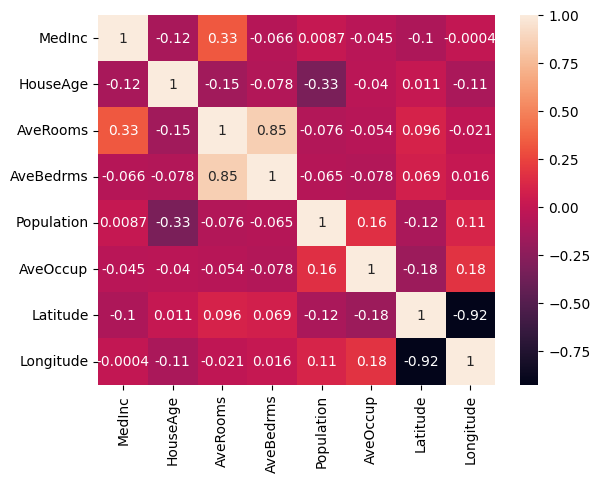

In [25]:
sns.heatmap(corr_matrix, annot=True)

**Observations:**
- Longitude and Latitude are Highly Negatively Correlated. Therefore, they could cause Multicollinearity
- Also, AvgRooms and AveBedrms are Highly Positively Correlated

### **VIF Analysis**
- Stands for **Variance Inflation Factor** (Inflation Coefficient)
- It is a measure used for regression analysis to assess **extent of multicollinearity**(for independent variables)
- Range:
    - VIF = 1 :  **No** multicollinearity
    - VIF > 5 :  **Moderate** multicollinearity
    - VIF > 10 : **High** multicollinearity

- After calculating VIF, inspect the **proportions** across the features. Then choose the highest 2 or 3 to drop 

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor      #VIF

In [27]:
vif_report = pd.DataFrame(X.columns, columns=['FeatureName'])
vif_report

,FeatureName
0,MedInc
1,HouseAge
2,AveRooms
3,AveBedrms
4,Population
5,AveOccup
6,Latitude
7,Longitude


In [28]:
vif_report['VIF'] = [variance_inflation_factor(X.values, col)for col in range(len(X.columns))]
vif_report

,FeatureName,VIF
0,MedInc,12.777122
1,HouseAge,7.294098
2,AveRooms,53.296041
3,AveBedrms,49.706183
4,Population,3.227969
5,AveOccup,30.999512
6,Latitude,599.029312
7,Longitude,789.743000


In [29]:
vif_report.sort_values(by='VIF', ascending=False)

,FeatureName,VIF
7,Longitude,789.743000
6,Latitude,599.029312
2,AveRooms,53.296041
3,AveBedrms,49.706183
5,AveOccup,30.999512
0,MedInc,12.777122
1,HouseAge,7.294098
4,Population,3.227969


Longitude and AveRooms along with others are very high. Let's drop 2 of them and observe 

In [30]:
X_low_vif = X.drop(columns=['Longitude', 'AveRooms'], axis=1)

Repeat Steps 3 and 4 

In [31]:
#step 2 (adding arbitrary constants)
X_constant = sm.add_constant(X_low_vif)

#step 3 (deploy OLS model)
ols_model_2 = sm.OLS(y, X_constant).fit()

#step 4(get summary of OLS model)
ols_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     4923.
Date:                Fri, 06 Feb 2026   Prob (F-statistic):               0.00
Time:                        23:57:02   Log-Likelihood:                -19928.
No. Observations:               18576   AIC:                         3.987e+04
Df Residuals:                   18569   BIC:                         3.992e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5908      0.103     35.031      0.000       3.390       3.792
MedInc         0.4259      0.003    155.044      0.000       0.420       0.431
HouseAge       0.0181      0.000     40.783      0.000       0.017       0.019
AveBedrms      0.0159      0.011      1.392      0.164      -0.006       0.038
Population  7.224e-05   5.19e-06     13.915      0.000    6.21e-05    8.24e-05
AveOccup      -0.4851      0.010    -49.522      0.000      -0.504      -0.466
Latitude      -0.0686      0.002    -27.663      0.000      -0.073      -0.064
==============================================================================
Omnibus:                     2730.154   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6764.944
Skew:                           0.835   Prob(JB):                         0.00
Kurtosis:                       5.440   Cond. No.                     3.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- We notice a **lower R-squared**, but that's okay since its not the main objective 
- We are trying to focus on what factors drive the MedHouseVal and get clean coefficients 
- We dropped AveRooms becuase it has higher VIF than AveBedrms. However, we may want to revisit and consider the opposite. Keep AveRooms and drop AveBedrms because AveRooms gives a full picture in total number of all rows 
- We should also consider the business side of it- which coefficients we can control and need to observe 
- If we think geolocation is important and need to be kept, consider dimensionality reduction using PCA
- You can consider dropping more features. So, use **Trial & Error** to get the best outcome

## Linear vs Polynomial Regression

The term polynomial is a type of math expression made by adding/subtracting/multiplying numbers and variables -with variables that have powers or exponents
- Therefore, Polynomial Regression is a way of modeling the relationship between the independent variable(s) X and dependent variable y, where the relationship isn't necessarily a **straight line** (could be curved)
    - Linear Regression: $y = B_0 + B_1X$
    - Polynomial Regression: eg: $y = B_0 + B_1X + B_2X^2$


![p](https://miro.medium.com/v2/resize:fit:1200/1*9x_5VZjJ1b5LhVvm5xRSRw.jpeg)

In [32]:
df = pd.read_csv('/home/vinayakgaur07/Downloads/position_salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


**Objective** : Predict salary based on level of job 

In [33]:
X = df[['Level']]
y = df[['Salary']]

#note: the double braces

Text(0, 0.5, 'Salary')

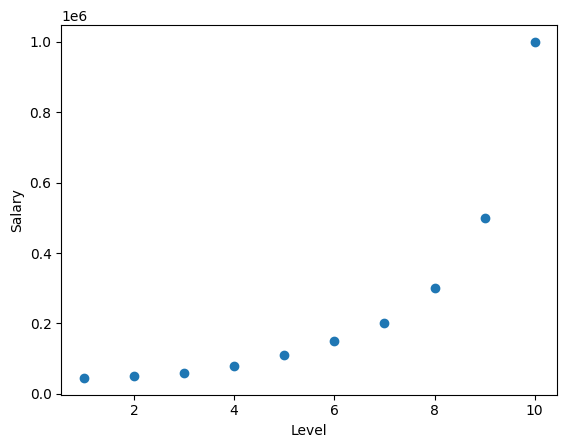

In [34]:
#to see the relationship between the two 
plt.scatter(X,y)
plt.xlabel('Level')
plt.ylabel('Salary')

> So the relationship is Non-linear

Lets just test this **Non-linear** Relationship by **Linear** Regression - this is just for sake of showcasing

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

Classic Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Polynomial Regression

![p](https://miro.medium.com/v2/resize:fit:1200/1*YDnuvD8M4kmkYHyth5mELA.jpeg)

1. Convert features to polyomial features 
2. Then deploy Linear Regression on the new features 

In [38]:
from sklearn.preprocessing import PolynomialFeatures

Step 1: converting features to PolynomialFeatures

#### **`PolynomialFeatures(degree=number)`**
- It defines a rule that generates polynomial terms of the input feature up to the degree number
- This controls model complexity and is a hyperparameter

#### **`fit_transform(X_train)`**
- This allows model to learns how to expand the input feature space and applies the transformation, converting the original features into a higher-dimensional polynomial feature matrix

In [39]:
pol_feat = PolynomialFeatures(degree=4)
#this is a hyperparameter that can be adjusted based on performance 

#apply
X_train_pol = pol_feat.fit_transform(X_train)

Step 2: Deploy Linear Regression

#### **`LinearRegression()`**
- Initializes a linear regression estimator that learns coefficients by minimizing squared error

#### **`fit(X_train, y_train)`**
- Fits the linear regression model on the polynomially expanded features, enabling it to model non-linear relationships in the original input space

In [40]:
pr_model = LinearRegression()
pr_model.fit(X_train_pol, y_train)  #using the new features makes the problem sol polynomial

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Build our fitted lines

#### **`lr_model.predict(X)`**
- Generates predictions using the linear regression model on the original (non-expanded) feature space

#### **`lr_model.predict(pol_feat.fit_transform(X))`**
- Applies the same polynomial feature expansion to the input and generates predictions using the polynomial regression model

In [41]:
lr_fitted_line = lr_model.predict(X)
pr_fitted_line = pr_model.predict(pol_feat.fit_transform(X))

now plot them

Text(0.5, 1.0, 'Polynomial Regression Solution(with degree 4)')

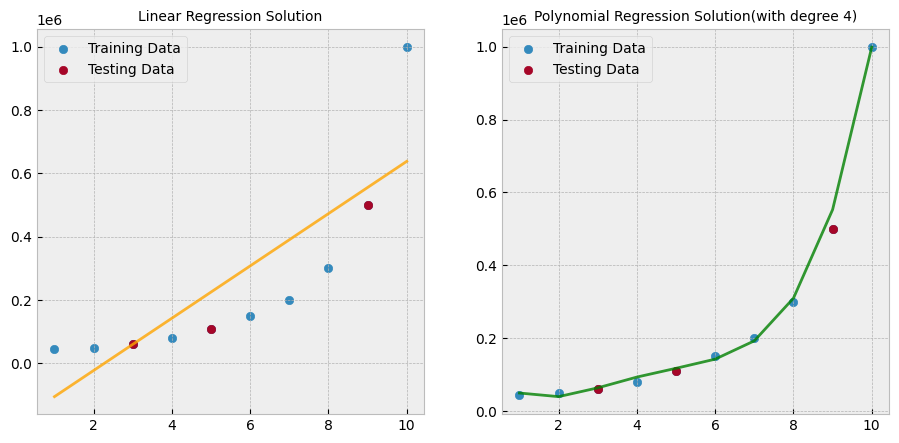

In [42]:
plt.style.use('bmh')    #gives grids 
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(11,5))

#adding dots
axes[0].scatter(X, y, label='Training Data')
axes[0].scatter(X_test, y_test, label='Testing Data')
axes[1].scatter(X, y, label='Training Data')
axes[1].scatter(X_test, y_test, label='Testing Data')

#adding fitted lines
axes[0].plot(X, lr_fitted_line, alpha=0.8, color='orange')
axes[1].plot(X, pr_fitted_line, alpha=0.8, color='green')

#customization
axes[0].legend()
axes[0].set_title('Linear Regression Solution',fontsize=10)
axes[1].legend()
axes[1].set_title('Polynomial Regression Solution(with degree 4)',fontsize=10)

#### **`lr_model.coef_`**
- It tells you how much each feature contributes to the prediction i.e., it returns returns the coefficients (weights) of the model 

In [43]:
lr_model.coef_, pr_model.coef_

(array([[82522.42152466]]),
 array([[      0.        , -149924.3046804 ,   71184.15004532,
          -12075.05188249,     731.49506962]]))

In [44]:
print("Linear Regression Coefficients: ",lr_model.coef_)
print("Polynomial Regression Coefficients: ",pr_model.coef_)

Linear Regression Coefficients:  [[82522.42152466]]
Polynomial Regression Coefficients:  [[      0.         -149924.3046804    71184.15004532  -12075.05188249
      731.49506962]]


#### **`lr_model.intercept_`**
- It is the starting value of the prediction when all input features are zero

In [45]:
print("Linear Regression Intercept: ",lr_model.intercept_)
print("Polynomial Regression Intercept: ",pr_model.intercept_)

Linear Regression Intercept:  [-187264.57399103]
Polynomial Regression Intercept:  [139446.33912198]
